# Assignment 4

## Loadng necessary libraries and data sets

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import seaborn as sns
%matplotlib inline

In [14]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [21]:
# Loading the datasets into working environment
test = pd.read_csv("city_day.csv")
train = pd.read_csv("tested.csv")


In [22]:
# Getting the total number of rows and columns
print("Training data shape:",train.shape)
print("Testing data shape:",test.shape)

Training data shape: (418, 12)
Testing data shape: (29531, 16)


In [128]:
# Printing the first five rows of the train dataset
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## b) Detect missing values numerically


In [170]:
#Detecting the missing values
def missing_values_table(df):
    mis_val=df.isnull().sum()
    mis_val_percent=100*df.isnull().sum()/len(df)
    mis_val_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0:'Missing Values',1:'% of Total Values', 2 : 'Data Type'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!= 0].sort_values('% of Total Values', ascending=False).round(0)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns
                                                                                   

In [171]:
# Missing values in train dataset
train_missing = missing_values_table(train)
train_missing

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,327,78.0
Age,86,21.0
Fare,1,0.0


In [30]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## c) Detect missing values visually using missingno library

In [37]:
! pip install missingno

<AxesSubplot:>

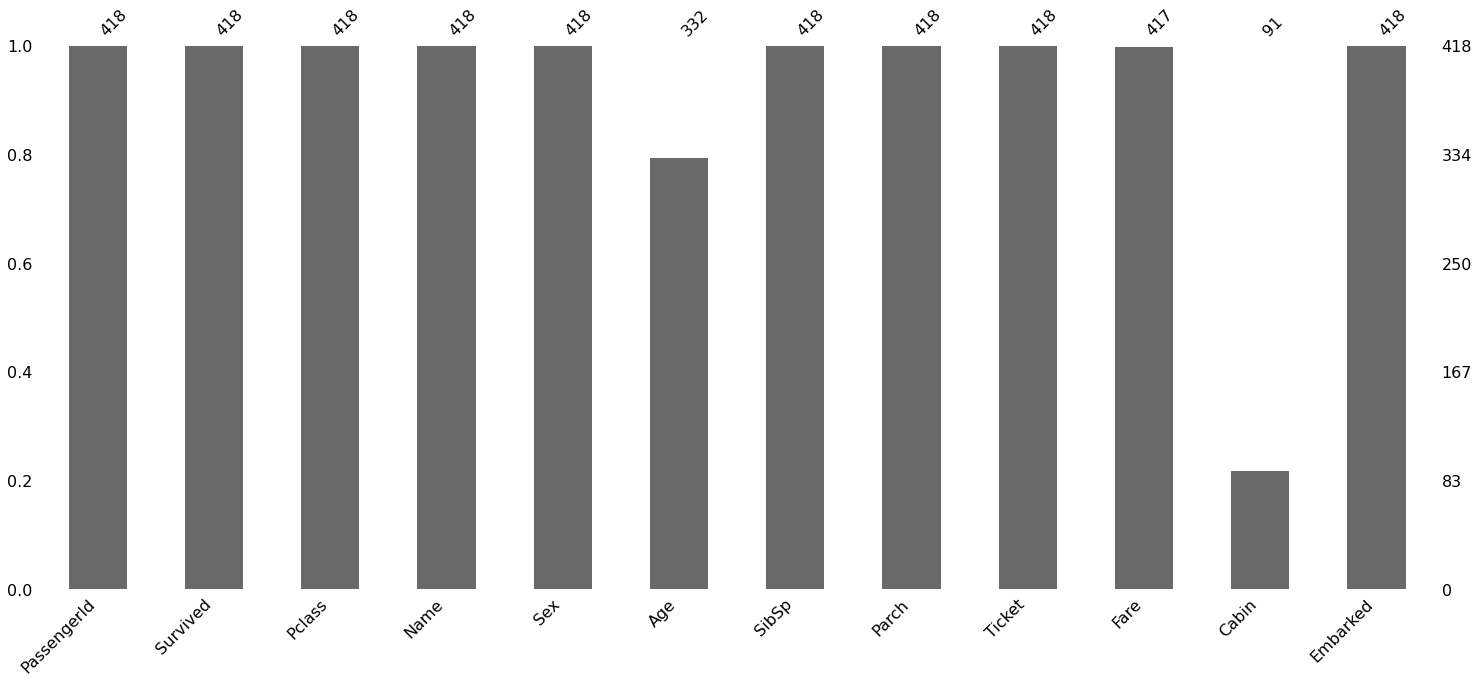

In [40]:
# Plotting bar chart
import missingno as msno
msno.bar(train)

<AxesSubplot:>

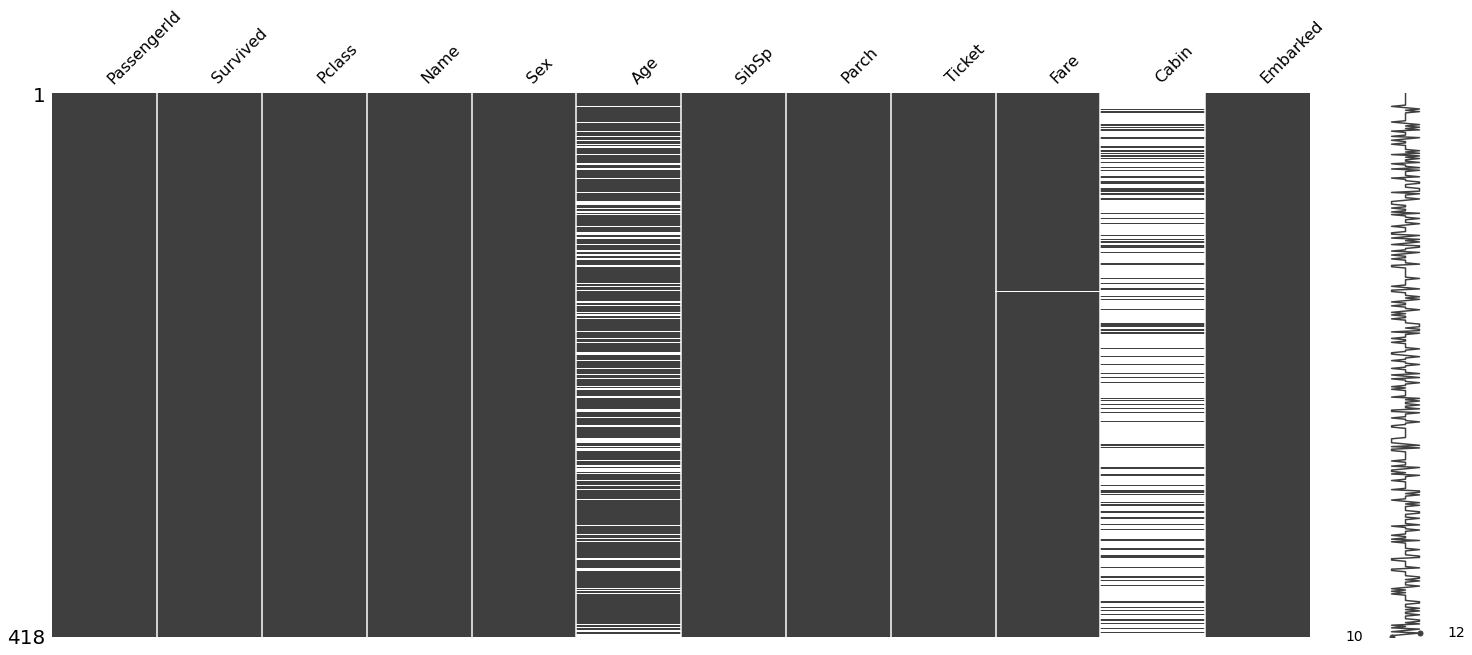

In [41]:
# Visualizing the locations of missing values
msno.matrix(train)

<AxesSubplot:>

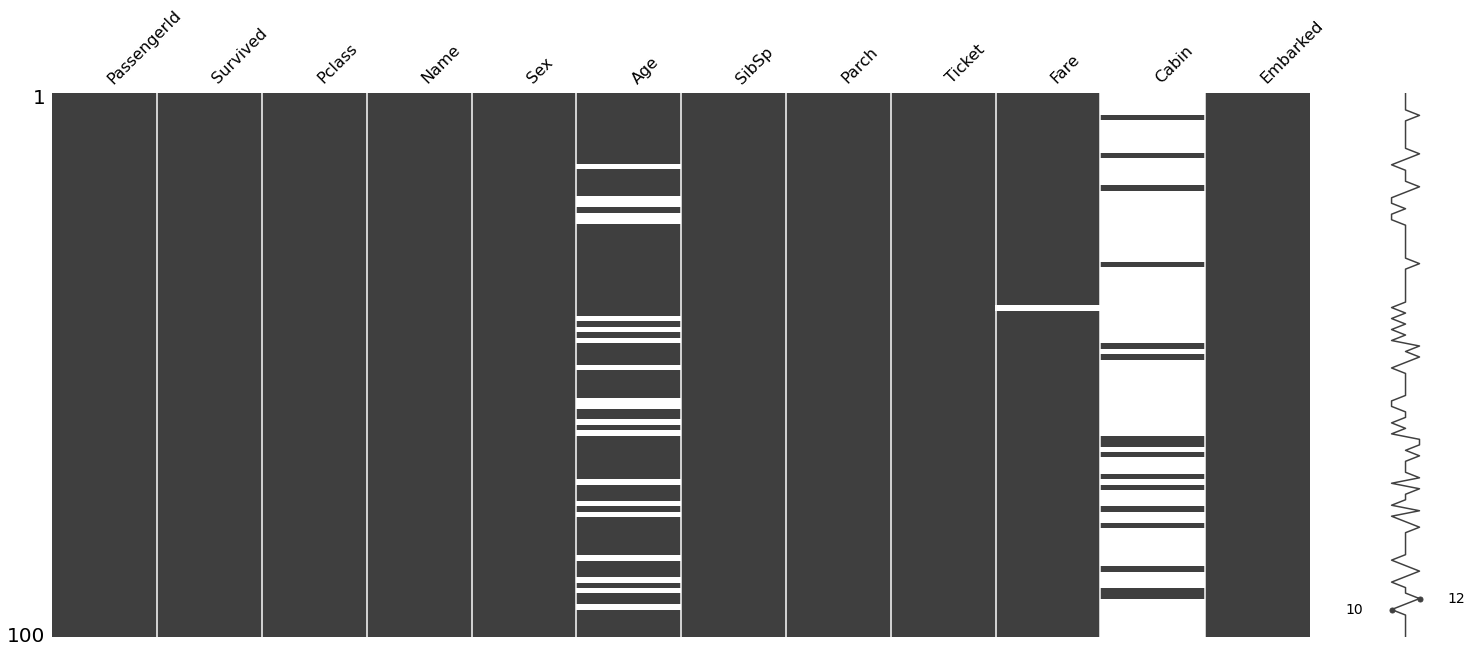

In [42]:
# Taking only the first 100 rows
msno.matrix(train.sample(100))

## using seaborn library

<AxesSubplot:>

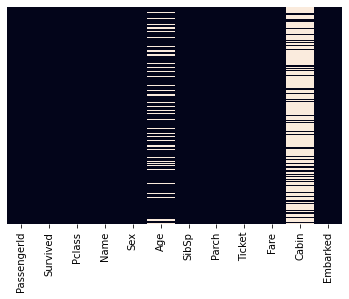

In [100]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,xticklabels=True)

## d) Find reasons for missing values using matrix plot, heap map and dendrogram

<AxesSubplot:>

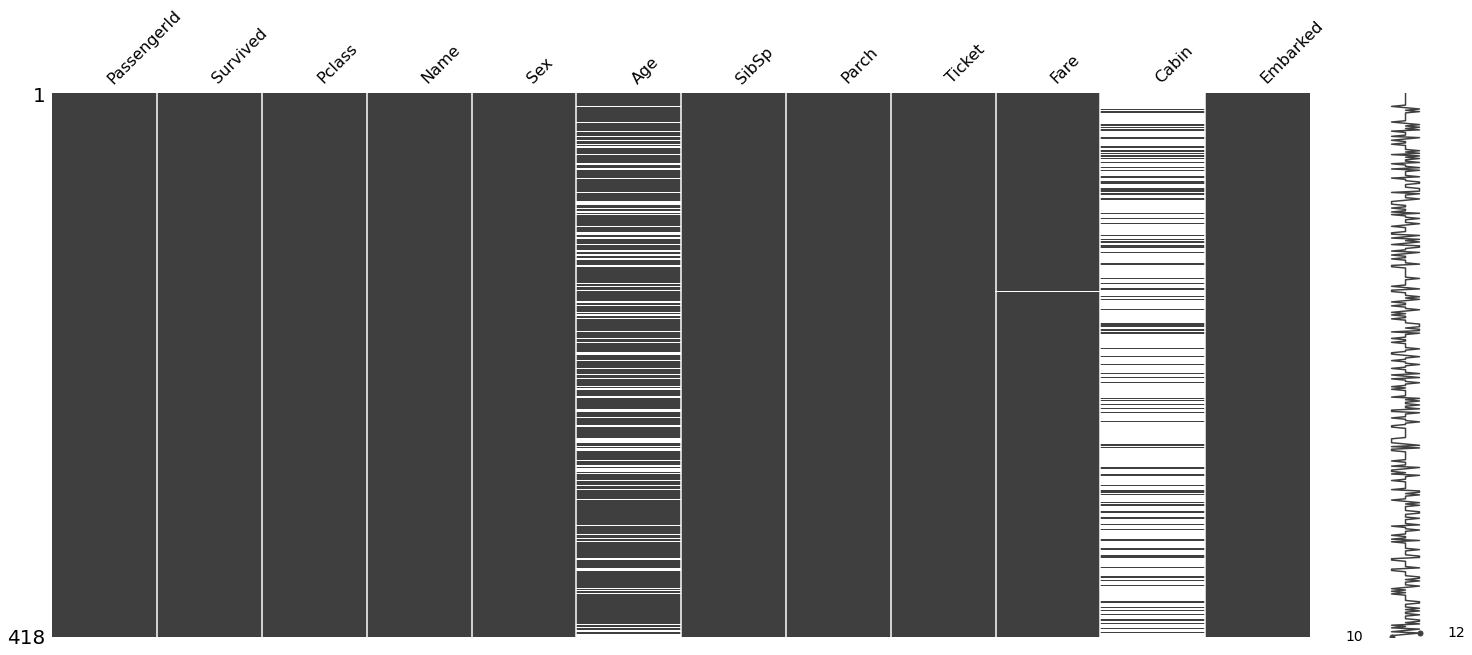

In [118]:

# Use matrix plot
msno.matrix(train)


<AxesSubplot:>

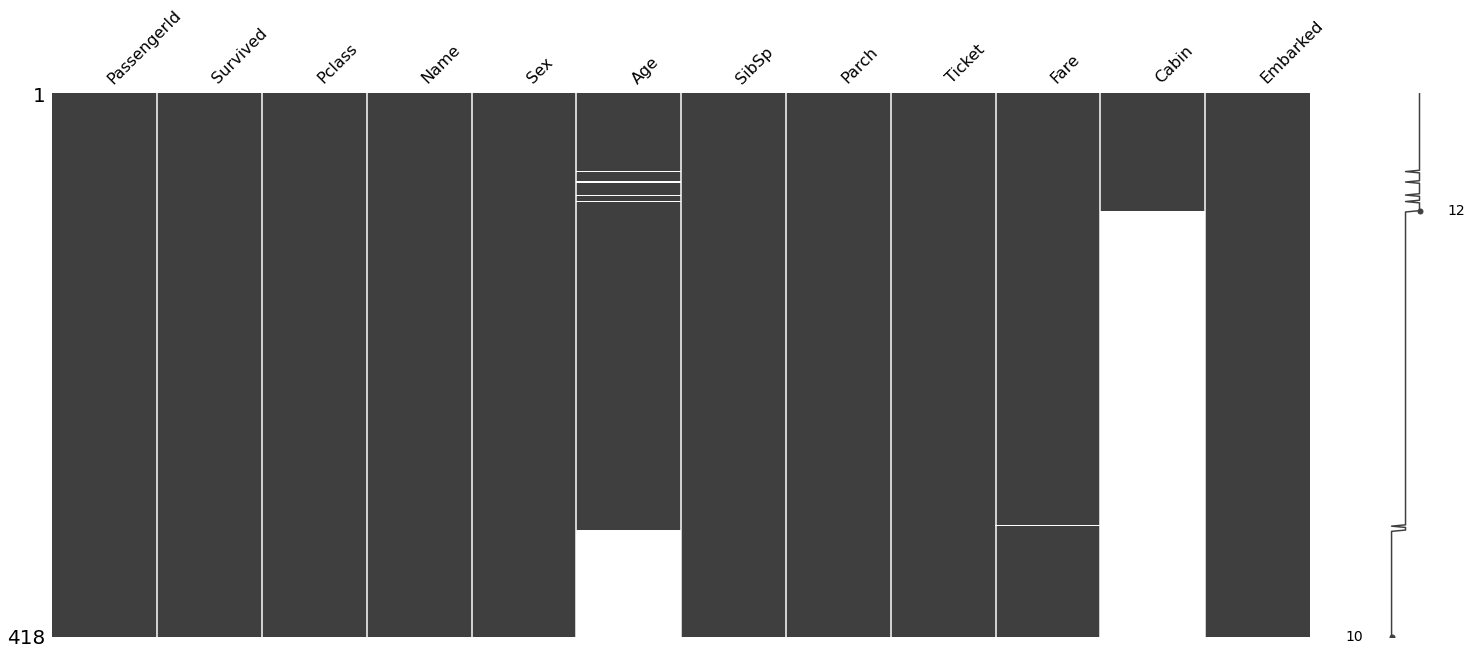

In [105]:

# Sorted by 'Age' and 'Cabin'
sorted = train.sort_values(['Cabin','Age'])
msno.matrix(sorted)

<AxesSubplot:>

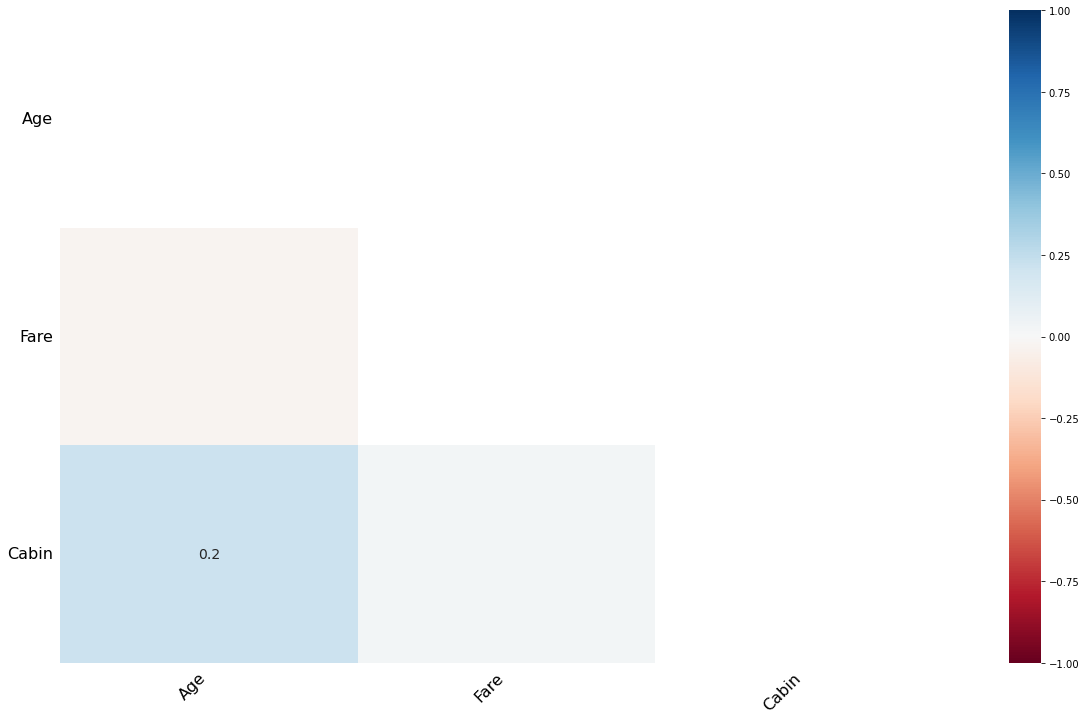

In [73]:

# Finding reason for missing data using heatmap
msno.heatmap(train)


<AxesSubplot:>

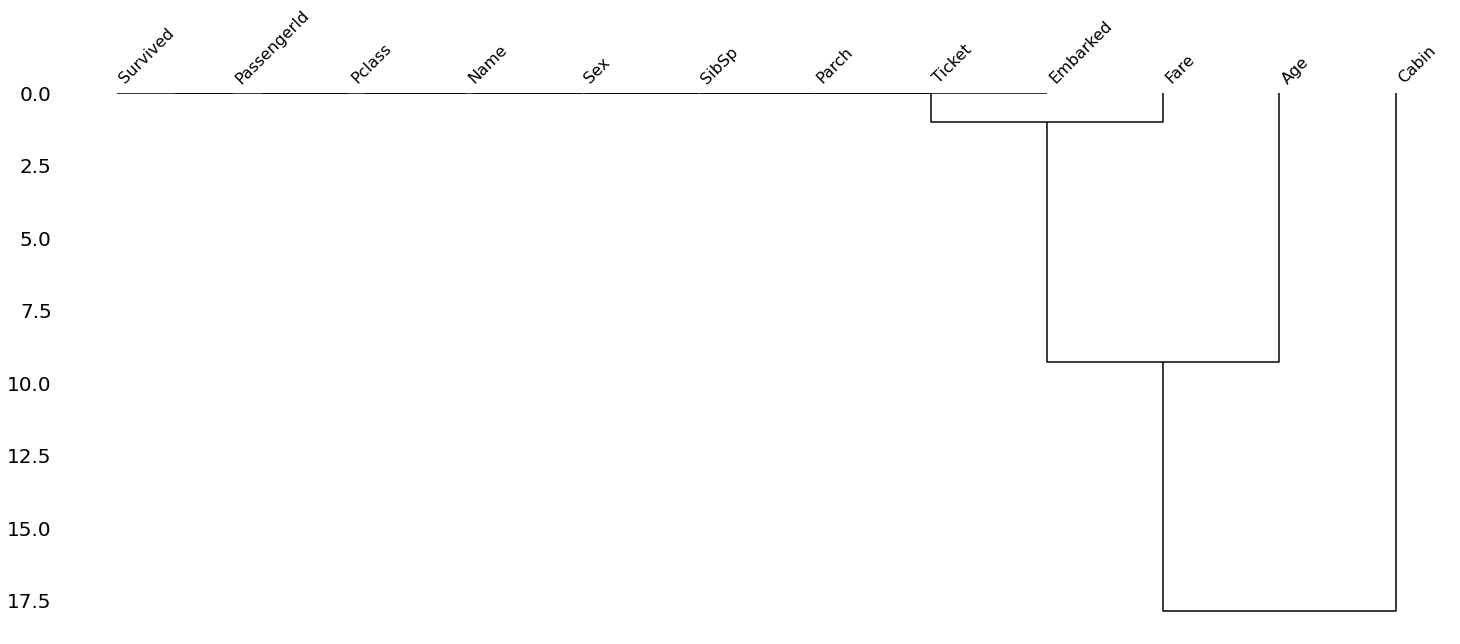

In [121]:

# Finding reasons for missing data using dendrogram
msno.dendrogram(train)
#plt.grid('train')

## e) Treat missing values (deletions, imputing for non time series data, imputing heatmap in dataset


In [75]:

# Get total number of missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [76]:

# pairwise deletion
train_1= train.copy()
train_1['Age'].mean()


30.272590361445783

In [144]:

# Dropping the rows with missing values
train_1.dropna(subset=['Age'],how='any',inplace = True)
train_1['Age'].isnull().sum()


0

In [155]:

# Imputing by constant
from sklearn.impute import SimpleImputer
train_constant = train.copy()
mean_imputer = SimpleImputer(missing_values=np.nan,strategy='constant')
train_constant.iloc[:,:] = mean_imputer.fit_transform(train_constant)
train_constant.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [79]:

# Imputing by most frequent value
from sklearn.impute import SimpleImputer
train_most_frequent = train.copy()
mean_imputer = SimpleImputer(strategy='most_frequent')
train_most_frequent.iloc[:,:] = mean_imputer.fit_transform(train_most_frequent)
train_most_frequent.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [81]:

city_day = pd.read_csv("city_day.csv")
city_day1 = city_day.copy(deep=True)
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [82]:

# Missing values
city_day_missing = missing_values_table(city_day)
city_day_missing


In [86]:
 #Imputing Xylene value
city_day['Xylene'][50:64]

50     7.48
51    15.44
52     8.47
53    28.46
54     6.05
55     0.81
56      NaN
57      NaN
58      NaN
59     1.32
60     0.22
61     2.25
62     1.55
63     4.13
Name: Xylene, dtype: float64

In [93]:

# Imputing by ffill
city_day.fillna(method= 'ffill',inplace=True)
city_day['Xylene'][50:65]


50     7.48
51    15.44
52     8.47
53    28.46
54     6.05
55     0.81
56     0.81
57     0.81
58     0.81
59     1.32
60     0.22
61     2.25
62     1.55
63     4.13
64     4.13
Name: Xylene, dtype: float64

In [98]:

# Imputing using bfill
city_day.fillna(method= 'ffill',inplace=True)
city_day['AQI'][20:30]


20    209.0
21    209.0
22    209.0
23    209.0
24    209.0
25    209.0
26    209.0
27    209.0
28    209.0
29    328.0
Name: AQI, dtype: float64